<a href="https://colab.research.google.com/github/psheehan/CIERA-HS-Program/blob/master/Projects/camille_liotine/AccretingBlackHoles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
### Running in Google Colab? You'll want to uncomment and run these cell once each time you start this notebook.

"""
!wget https://raw.githubusercontent.com/psheehan/CIERA-HS-Program/master/Projects/AccretingBlackHoles/cosmic_data_1.csv
!wget https://raw.githubusercontent.com/psheehan/CIERA-HS-Program/master/Projects/AccretingBlackHoles/cosmic_data_2.csv
"""

# **How Bright are Accreting Black Holes in Binary Systems?**
## ***A Computational Investigation***
Leader: Camille Liotine

#### **Background**

Binary star systems consist of two stars that orbit one another. Depending on the mass of these stars, one or more of them may explode in a supernova and form a black hole late in their lifetime. This is generally the case for stars with initial masses greater than 20 times that of the sun, or 20 solar masses ($M_\odot$). 

In the majority of these binary systems, black hole formation occurs asynchronously. This implies that the binary undergoes a period time where one object is a black hole and one object is still a star. This stage of evolution is called the x-ray binary phase, and the system is referred to as an **x-ray binary**.

Why do we call these systems x-ray binaries? During this evolutionary stage, the black hole accretes matter from its companion star due to its strong gravitational pull. The accretion process heats transferred material through gravitational and frictional forces, which in turn triggers the emission of x-rays. Below is a helpful illustration of this process:

<img src="HMXB_illustration.jpg">


Because the matter surrounding these black holes emits brightly in the x-ray band of the electromagnetic spectrum, x-ray observatories (such as the Chandra Observatory) search for this emission to identify binary systems that house black holes. The brightness, or luminosity, that astronomers observe in these binaries is called the **accretion luminosity**, as it is the luminosity that results from the accretion process of stellar material onto the black hole. These observations help astronomers learn about the properties of these systems and predict their possible courses of evolution. For example, some astronomers are interested in finding systems like these that will eventually form colliding black holes, which can be observed with gravitational wave detections.

In this project, we will take a closer look at how we can predict the luminosity of these black hole systems using computational methods and data from simulations.  Theoretical calculations like these help astronomers target their observations towards certain luminosities so that they can better identify these systems in the sky. These calculations also help astronomers compare their theoretical predictions with observations so that they can better understand if there are flaws in their theoretical or observational methods.

#### **Building a Luminosity Function**

First, we need to write a function that calculates and returns the accretion luminosity of a black hole in a binary system. Once we have this function, we can apply it to simulation data in multiple different ways. Previous theoretical work tells us that the black hole accretion luminosity is calculated by:






$L_{acc} = \eta \dot{M}_{acc}c^2$

where $L_{acc}$ is the accretion luminosity, $\eta$ is a scale factor derived from relativistic properties of the black hole, $\dot{M}_{acc}$ is the accretion rate of material onto the black hole, and $c$ is the speed of light.



The parameters $\eta$ and $\dot{M}_{acc}$ are calculated by:

$\eta = 1 - \sqrt{1 - \bigg(\frac{M_{BH}}{3M_{BH,0}}\bigg)^2}$

$\dot{M}_{acc} = \frac{\dot{M}_{BH}}{1 - \eta}$

where $M_{BH}$ is the current black hole mass, $M_{BH,0}$ is the initial black hole mass, and $\dot{M}_{BH}$ is the rate of change of the black hole mass.

The parameters provided in our simulation output are $M_{BH}$, $M_{BH,0}$, and $\dot{M}_{BH}$. Using this information and the equations above, define a function in python that takes the appropriate input parameters, calculates $L_{acc}$, $\eta$, and $\dot{M}_{acc}$ in the proper order, and returns the accretion luminosity. The general format of the function should look like:



```
def calc_Lacc(<function arguments>):

  < calculate Lacc using the above formulae >

  return Lacc
```



Don't worry about defining numeric quantities for constants yet. 

In [ ]:
def calc_Lacc(M_BH, M_BH0, Mdot_BH):
    # Calculate eta
    eta = 1. - (1. - (M_BH/(3*M_BH0))**2)**0.5
    
    # Calculate Mdot_acc
    Mdot_acc = Mdot_BH / (1 - eta)
    
    # Calculate L_acc
    L_acc = eta * Mdot_acc * c**2
    
    return L_acc

There are a couple refinements we need to make to our function before we can apply it to our simulation data. The first is that there is an upper limit for $\eta$. Specifically, if $M_{BH}$ exceeds $\sqrt{6}M_{BH,0}$, then $\eta$ is taken to be $0.42$. Copy and paste your old function below, and then add this condition into your calculation for $\eta$.

In [ ]:
def calc_Lacc(M_BH, M_BH0, Mdot_BH):
    # Calculate eta
    if M_BH > 6.**0.5 * M_BH0:
        eta = 0.42
    else:
        eta = 1. - (1. - (M_BH/(3*M_BH0))**2)**0.5
    
    # Calculate Mdot_acc
    Mdot_acc = Mdot_BH / (1 - eta)
    
    # Calculate L_acc
    L_acc = eta * Mdot_acc * c**2
    
    return L_acc

Next, we need to apply a **bolometric correction** to our calculated luminosity. A bolometric correction is a multiplicative factor that accounts for differences between the visible luminosity that we observe and the true brightness of the observed source. Bolometric corrections usually vary depending on the observing apparatus and specific properties of the observed object. However, since we are simulating binaries and not observing them, we take the bolometric correction factor to be constant for all sources. For binaries with accreting black holes, this correction is $0.8$. Copy and paste your old function below, and then multiply your final accretion luminosity by this factor before returning it. 

In [ ]:
def calc_Lacc(M_BH, M_BH0, Mdot_BH):
    # Calculate eta
    if M_BH > 6.**0.5 * M_BH0:
        eta = 0.42
    else:
        eta = 1. - (1. - (M_BH/(3*M_BH0))**2)**0.5
    
    # Calculate Mdot_acc
    Mdot_acc = Mdot_BH / (1 - eta)
    
    # Calculate L_acc
    L_acc = eta * Mdot_acc * c**2
    
    # Apply a bolometric correction
    L_acc *= 0.8
    
    return L_acc

Lastly, we need to adjust the units of our calculation so that our final accretion luminosity has the traditional units of x-ray observations. To do this, we need to know the units of our simulation variables. Below is a list of the units for our simulation output data:

$M_{BH}$ ---> [$M_\odot$]

$M_{BH,0}$ ---> [$M_\odot$]

$\dot{M}_{BH}$ ---> [$M_\odot yr^{-1}$]

We want our final luminosity to be in **ergs per second**, or $erg$  $s^{-1}$, which is a common unit of measure for luminosities in astronomy. A helpful unit conversion for one $erg$ is:

[$erg$] = [$g$ $cm^2$ $s^{-2}$]

Unforunately, it looks like we have a lot of converting to do! Alas, if you continue with astronomy or astrophysics, you'll find this is a common practice, as astronomers like to use a plethora of unique and often inconvenient units. 

Using dimensional analysis, work out any additional multiplicative constants you may need to add to your calculations so that your returned accretion luminosity has the correct units. You can choose the units of $c$ to be whatever is most convenient for your calculations. Copy and paste your old function below, and then write in your unit adjustments. Once you are done, define numeric quantities for your constants at the beginning of your function.

In [37]:
def calc_Lacc(M_BH, M_BH0, Mdot_BH):
    # Units that might be useful.
    c = 2.9959e10
    M_sun = 1.989e+33
    year = 3.154e+7
    
    # Calculate eta
    if M_BH > 6.**0.5 * M_BH0:
        eta = 0.42
    else:
        eta = 1. - (1. - (M_BH/(3*M_BH0))**2)**0.5
    
    # Calculate Mdot_acc
    Mdot_acc = Mdot_BH*M_sun/year / (1 - eta)
    
    # Calculate L_acc
    L_acc = eta * Mdot_acc * c**2
    
    # Apply a bolometric correction
    L_acc *= 0.8
    
    return L_acc

To test your function, use it to calculate the accretion luminosity for a system with $M_{BH} = 11.645$ M$_{\odot}$, $M_{BH,0} = 11.611$ M$_{\odot}$, $\dot{M}_{BH} = 3.026\times10^{-7}$ M$_{\odot}$ yr$^{-1}$, and check with a supervisor that this value is correct.

In [38]:
calc_Lacc(11.645,11.611,3.026e-7)

8.36501138194697e+38

Your function is now ready to go! Let's put it to work with some simulation data.

#### **Applying Your Luminosity Function to Data: ```for``` Loop Method**

First, read-in the simulation data file called ```"cosmic_data_1.csv"```, located in this Github project folder, and store it as a ```pandas``` dataframe. Make sure to import ```pandas``` and any other packages you might need first! 

In [3]:
import pandas

data = pandas.read_csv("cosmic_data_1.csv")

Now, open the file and examine its format, including column titles, the number of rows, etc. 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 39 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tphys         132 non-null    float64
 1   kstar_1       132 non-null    float64
 2   mass0_1       132 non-null    float64
 3   mass_1        132 non-null    float64
 4   lum_1         132 non-null    float64
 5   rad_1         132 non-null    float64
 6   teff_1        132 non-null    float64
 7   massc_1       132 non-null    float64
 8   radc_1        132 non-null    float64
 9   menv_1        132 non-null    float64
 10  renv_1        132 non-null    float64
 11  epoch_1       132 non-null    float64
 12  omega_spin_1  132 non-null    float64
 13  deltam_1      132 non-null    float64
 14  RRLO_1        132 non-null    float64
 15  kstar_2       132 non-null    float64
 16  mass0_2       132 non-null    float64
 17  mass_2        132 non-null    float64
 18  lum_2         132 non-null    

This file contains the evolutionary data for a single simulated binary system during its x-ray binary phase. Each row represents one timestep of the simulation, which you can see by looking at the ```tphys``` column. ```tphys``` is the time, in millions of years (Myr), since the binary began its evolution. As a warm-up to practice working with the data, use ```pandas``` operations to calculate how long this system was in the x-ray binary phase, and print your result. *Hint: You can access columns in ```pandas``` using ```data['column_name']```, and you can access specific rows using ```.iloc[row_number]```*.





In [13]:
data['tphys'].max() - data['tphys'].min()

1.309999999999972

The parameters we will need to calculate the accretion luminosity are ```mass_2```, which represents the black hole mass, and ```deltam_2```, which represents the rate of change in the black hole mass. One way we can acquire luminosity information is to loop through the dataframe, row by row, and calculate the luminosity at each time step using our function.

First, write a ```for``` loop that goes through each row of the data frame and applies your luminosity function at each iteration. Save your calculated luminosities in an array. Print your final array of luminosities to check that they are reasonable. Reasonable luminosities should fall between $10^{30}$ and $10^{45}$ $erg$ $s^{-1}$. *Hint: you will need to use a special iterator for your dataframe. Try the pandas function ```iterrows()```.* 

In [40]:
Lacc = []

for i, row in data.iterrows():
    Lacc.append(calc_Lacc(row["mass_2"],row["mass0_2"],row["deltam_2"]))
    
print(Lacc)

[7.982383363771417e+34, 8.092380927389945e+34, 8.204343345023788e+34, 8.318310312639689e+34, 8.434322241979607e+34, 8.552420259562646e+34, 8.672646204254263e+34, 8.795042623268788e+34, 8.919652766461458e+34, 9.046520578756893e+34, 9.17569069054849e+34, 9.307208405892672e+34, 9.441119688310311e+34, 9.577471143991956e+34, 9.71631000219356e+34, 9.857684092590819e+34, 1.0001641819348302e+35, 1.0148232131640087e+35, 1.0297504490344743e+35, 1.044950883061555e+35, 1.0604295520011179e+35, 1.0761915311849767e+35, 1.092241929342902e+35, 1.1085858828731709e+35, 1.1252285495214875e+35, 1.142175101425354e+35, 1.1594307174786346e+35, 1.177000574968371e+35, 1.1948898404330098e+35, 1.2131036596883418e+35, 1.2316471469646577e+35, 1.2505253730950902e+35, 1.2697433526923392e+35, 1.2893060302473663e+35, 1.309218265080354e+35, 1.3294848150707012e+35, 1.3501103190892861e+35, 1.3710992780526033e+35, 1.3924560345146634e+35, 1.414184750708967e+35, 1.4362893849491022e+35, 1.4587736662928867e+35, 1.4816410673713

Now that we have the accretion luminosity data for our binary, let's plot it to see how the system's emission changes over time. Using ```matplotlib```, make a time series plot using the ```tphys``` column from the simulation output along with your array of luminosities. Make sure to properly label your plot! *Hint: Use a log scale when plotting your luminosities so that you can better visualize the emission behavior.*

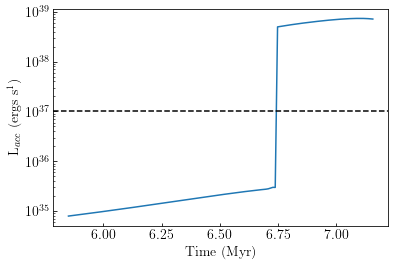

In [39]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=1)

ax.plot(data["tphys"], Lacc, "-")

ax.set_xlabel("Time (Myr)", fontsize=14)
ax.set_ylabel("L$_{acc}$ (ergs s$^{1}$)", fontsize=14)

ax.axhline(1.0e37, linestyle="--", color="black")

ax.tick_params("both", labelsize=14)

ax.set_yscale('log')

One question researchers might ask is if a given binary system is observable. For a system to be observed by an x-ray observatory, it must reach a maximum luminosity above an observable threshold. Let's take our observable threshold to be $10^{37} erg$ $s^{-1}$, which is a common threshold used for the Chandra Observatory. Using your calculations, find the maximum luminosity of your binary system. Is it observable?

In [32]:
print(max(Lacc))

7.339323761603064e+38


#### **Applying Your Luminosity Function to Data: Array Method**

It turns out that ```for``` loops are too computationally slow to analyze very large files or many files in one run. Luckily, we can speed-up our code by passing arrays to our luminosity function instead of passing values at each timestep of the data. This will allow us to calculate all luminosities for the binary in one step! However, this method will require some alteration to your luminosity function.

Primarily, now that your function takes arrays as parameters instead of values, you can no longer use conditional logic to determine what $\eta$ should be. Instead, you should use boolean array logic, which is a standard application of ```numpy``` arrays. 

For example, let's say I have two arrays of the same size called ```x``` and ```y```. If want to know which values of ```x``` are less than their corresponding values in ```y```, I can write:

```x_lower_values = x < y```

```x_lower_values``` is an array of the same size as ```x``` and ```y```. It it contains ```True/False``` entries that tell me if the corresponding entry in ```x``` is less than that in ```y```. 

Another useful tool that might help you rework your luminosity function is the ```numpy``` function ```where()```. This function takes as parameters a boolean array (such as ```x_lower_values``` in the example above) and two possible outcomes. It returns an array of these two outcomes, and outcomes are assigned to an array entry depending on if that entry is ```True``` or ```False```.

Copy and paste your old luminosity function below. Then, using the tools described above and/or any other methods you prefer, alter you luminosity function so that it takes array parameters and then calculates and returns an array of accretion luminosities using array operations.

In [41]:
import numpy

def calc_Lacc_numpy(M_BH, M_BH0, Mdot_BH):
    # Units that might be useful.
    c = 2.9959e10
    M_sun = 1.989e+33
    year = 3.154e+7
    
    # Calculate eta
    eta = numpy.where(M_BH > 6.**0.5*M_BH0, 0.42, 1. - (1. - (M_BH/(3*M_BH0))**2)**0.5)
    
    # Calculate Mdot_acc
    Mdot_acc = Mdot_BH*M_sun/year / (1 - eta)
    
    # Calculate L_acc
    L_acc = eta * Mdot_acc * c**2
    
    # Apply a bolometric correction
    L_acc *= 0.8
    
    return L_acc


Now, apply your new and improved function to the data set above. You should now only need one line of code to calculate your array of accretion luminosities. Print your final array of luminosities to check that they are reasonable. *Hint: you may need to create an array for $M_{BH,0}$ that is the same length as your arrays for $M_{BH}$ and $\dot M_{BH}$ in order to pass it to your function.*

In [42]:
Lacc_numpy = calc_Lacc_numpy(data["mass_2"], data["mass0_2"], data["deltam_2"])

To double check that your improved function is working correctly, make another time series plot using ```matplotlib```. This time, plot the accretion luminosities you obtained with the ```for``` loop method as well as those you obtained with the array method. They should appear to be the same line on your plot! Make sure to properly label your plot.

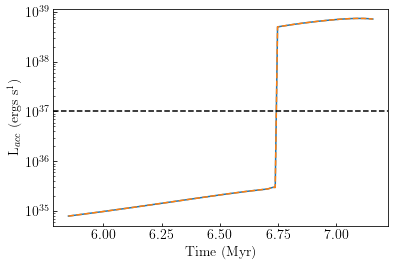

In [43]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=1)

ax.plot(data["tphys"], Lacc, "-")
ax.plot(data["tphys"], Lacc_numpy, "--")

ax.set_xlabel("Time (Myr)", fontsize=14)
ax.set_ylabel("L$_{acc}$ (ergs s$^{1}$)", fontsize=14)

ax.axhline(1.0e37, linestyle="--", color="black")

ax.tick_params("both", labelsize=14)

ax.set_yscale('log')

One fun way to examine the computational difference between your two luminosity functions is to time how long each of them takes to run. Copy and paste your pieces of code that run your different luminosity functions below. Import the python ```time``` module and use the ```time()``` function to determine the runtime of each code segment. Print both runtimes to compare them.

In [44]:
import time

t1 = time.time()

Lacc = []
for i, row in data.iterrows():
    Lacc.append(calc_Lacc(row["mass_2"],row["mass0_2"],row["deltam_2"]))    

t2 = time.time()

Lacc_numpy = calc_Lacc_numpy(data["mass_2"], data["mass0_2"], data["deltam_2"])

t3 = time.time()

print("For loop time: ", t2 - t1)
print("Numpy time: ", t3 - t2)

For loop time:  0.005583047866821289
Numpy time:  0.0014309883117675781


Even though the difference in runtimes may seem small, it is actually quite noticeable when applied to many systems. For example, one standard simulation run contains a population of ~50,000 binaries. Calculate how long each method would take to analyze the luminosities of a full population of binaries, and convert the resulting times (in seconds) to more useful units. 

In [45]:
print("For loop time for 50,000 binaries: ", 50000*(t2 - t1))
print("Numpy time for 50,000 binaries: ", 50000*(t3 - t2))

For loop time for 50,000 binaries:  279.15239334106445
Numpy time for 50,000 binaries:  71.5494155883789


Now, suppose we run a total of 10 different simulations, and need to analyze the luminosities of all systems in each simulation. How long does each method take to complete these calculations? Were the improvements to your luminosity function worth it?

In [46]:
print("For loop time for 50,000 binaries: ", 10*50000*(t2 - t1))
print("Numpy time for 50,000 binaries: ", 10*50000*(t3 - t2))

For loop time for 50,000 binaries:  2791.5239334106445
Numpy time for 50,000 binaries:  715.4941558837891


#### **Bonus: Extended Data File**

The file ```cosmic_data_1.csv``` is actually a very small portion of a full simulation output file. Normally, researchers want information about the entire evolution of a binary system so that characteristics of its behavior, such as its merge status, emission properties, etc. are placed in context with one other. This allows correlations to be drawn between evolutionary behaviors and facilitates a more complete understanding of how binary evolution works.

Read-in the simulation data file ```cosmic_data_2.csv```, also located in this project folder, and store it as a ```pandas``` dataframe (it may take a couple of minutes to upload). Open the file and examine its format, including column titles, the number of rows, etc. 

In [54]:
data = pandas.read_csv("cosmic_data_2.csv")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27515 entries, 0 to 27514
Data columns (total 39 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tphys         27515 non-null  float64
 1   kstar_1       27515 non-null  float64
 2   mass0_1       27515 non-null  float64
 3   mass_1        27515 non-null  float64
 4   lum_1         27515 non-null  float64
 5   rad_1         27515 non-null  float64
 6   teff_1        27515 non-null  float64
 7   massc_1       27515 non-null  float64
 8   radc_1        27515 non-null  float64
 9   menv_1        27515 non-null  float64
 10  renv_1        27515 non-null  float64
 11  epoch_1       27515 non-null  float64
 12  omega_spin_1  27515 non-null  float64
 13  deltam_1      27515 non-null  float64
 14  RRLO_1        27515 non-null  float64
 15  kstar_2       27515 non-null  float64
 16  mass0_2       27515 non-null  float64
 17  mass_2        27515 non-null  float64
 18  lum_2         27515 non-nu

This file is clearly far more massive than the previous one - and it is still a reduced version of the full simulation output! To work with the complete data set, we would need a supercomputer. However, this reduction will be suitable for the remainder of our investigation. The bonus portion of this project will involve identifying the x-ray binary phase of the system ourselves and applying our luminosity function to the appropriate subset of the extended data file. 

First, we need to identify when the x-ray binary phase begins. We can do this by finding the timestep when the first black hole is formed, which is recorded in the ```kstar_1``` and ```kstar_2``` columns of the data file. If ```kstar_1``` or ```kstar_2``` equals $14$, then that respective object is a black hole. The x-ray binary phase begins when the first black hole's accretion rate becomes greater than zero.

Write a piece of code that identifies the timestep or index of the data file at which each object in the binary becomes a black hole. Store each index as a variable.





In [57]:
ind0_1 = numpy.where(data["kstar_1"] == 14)[0].min()
ind0_2 = numpy.where(data["kstar_2"] == 14)[0].min()

Using conditional logic, compare the indicies or timesteps you found above, and determine which black hole formed first. Then, using this information, identify the data columns for $M_{BH}$ and $\dot{M}_{BH}$ that correspond to the first black hole object. Also store the first and second black hole formation indicies as separate variables. 

In [58]:
if ind0_1 < ind0_2:
    print("Object 1 formed a black hole first.")
else:
    print("Object 2 formed a black hole first.")

Object 2 formed a black hole first.


Now, using the appropriate data columns, identify the index when the black hole accretion rate becomes positive. This index signifies the beginning of the x-ray binary phase. Store this index as a separate variable. 

In [61]:
ind1_2 = numpy.where(data["deltam_2"] > 0)[0].min()

The x-ray binary phase terminates when the black hole accretion rate is no longer positive. Using similar methods as above, identify the index when the x-ray binary phase ends. Store this index as a separate variable. To check that your indicies make sense, print the indicies of black hole formation as well as those identifying the x-ray binary phase and make sure they fall in the correct chronological order.

In [63]:
ind2_2 = numpy.where(data["deltam_2"] > 0)[0].max()

print(ind0_2, ind1_2, ind2_2)

12 12 127


Cut the data you need to calculate the accretion luminosity using the indices you found above so that the data begins and ends with the x-ray binary phase. Store your reduced data in separate arrays.

In [65]:
M_BH = data["mass_2"][ind1_2:ind2_2+1]
M_BH0 = data["mass0_2"][ind1_2:ind2_2+1]
Mdot_BH = data["deltam_2"][ind1_2:ind2_2+1]

You should now be able to pass your reduced data arrays directly to your function! Do this to calculate the accretion luminosity of the binary during the x-ray binary phase, and print the resulting array of luminosities. Determine if this system is observable.

In [67]:
Lacc = calc_Lacc_numpy(M_BH, M_BH0, Mdot_BH)
print(Lacc.max())

6.397389906390028e+38


As a last step, compare your new luminosities to those you found above with the ```cosmic_data_1.csv``` data set. Use ```matplotlib``` to plot a time series of the binary emission over time, and label your plot accordingly. *Hint: you will need to apply the same cuts to the ```tphys``` column of ```cosmic_data_2.csv``` that you applied to your luminosity input parameters in order to plot your luminosities.*

What are some similarities and differences between the emission of the first and second binary system?

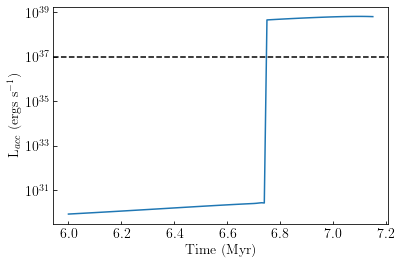

In [74]:
time = data["tphys"][ind1_2:ind2_2+1]

fig, ax = plt.subplots(nrows=1, ncols=1)

ax.plot(time, Lacc, "-")

ax.axhline(1.0e37, linestyle="--", color="black")

ax.set_xlabel("Time (Myr)", fontsize=14)
ax.set_ylabel("L$_{acc}$ (ergs s$^{-1}$)", fontsize=14)

ax.tick_params('both', labelsize=14)

ax.set_yscale("log")

Congratulations, you have completed this project! I hoped you have learned some new information about x-ray binary systems, and have also sharpened your coding skills by experimenting with computational methods commonly used in research. If you are looking for more challenges, ask Camille and she will happily give you some!